In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [388]:
df = pd.read_csv("D:\Advanced_training\Advanced-training-Python-AIML\Day-5\height-weight.csv")

In [389]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [390]:
df.columns

Index(['Weight', 'Height'], dtype='object')

In [391]:
df.shape

(23, 2)

Text(0, 0.5, 'Height')

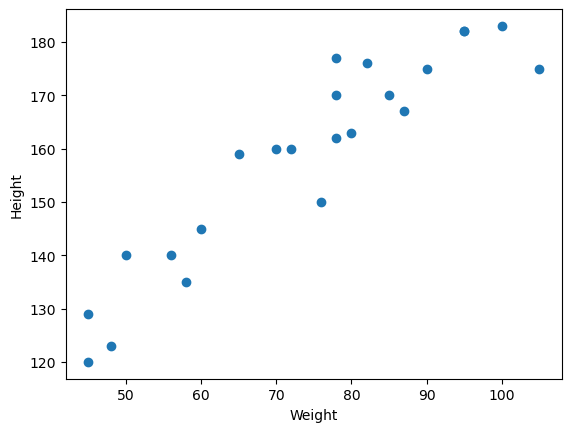

In [392]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [393]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


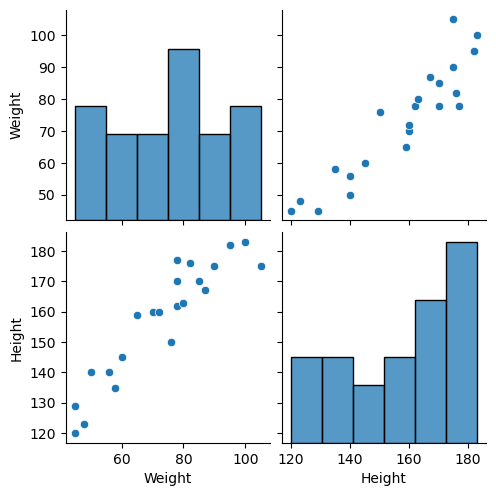

In [394]:
sns.pairplot(df)

In [395]:
x=df['Weight']
y=df['Height']

In [396]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [397]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [398]:
scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)


In [399]:
x_train = scaler.fit_transform(x_train.values.reshape(-1,1))

In [400]:
x_test = scaler.transform(x_test.values.reshape(-1,1))

In [401]:
x_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [402]:
from sklearn.linear_model import LinearRegression

In [403]:
regression = LinearRegression(n_jobs=-1)

In [404]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [405]:
print("regression.intercept_ : - ",regression.intercept_)

regression.intercept_ : -  156.47058823529412


In [406]:
print("regression.coef_: - ",regression.coef_)

regression.coef_: -  [17.2982057]


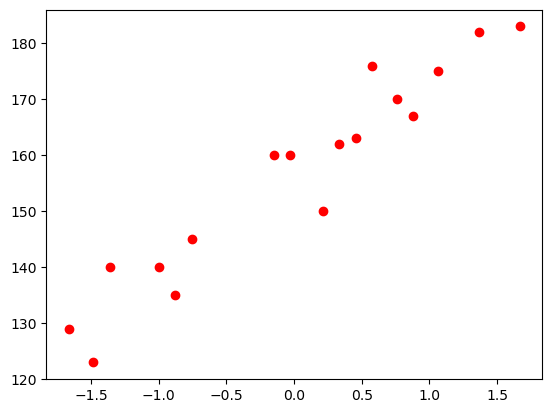

In [407]:
plt.scatter(x_train,y_train,c='red')
# plt.scatter(regression.predict(x_test),y_test)

## Prediction of data

In [408]:
y_pred = regression.predict(x_test)


In [409]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [410]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [411]:
from sklearn.metrics import r2_score ## it give value between o and 1

In [412]:
print(r2_score(y_test,y_pred)) ## r2score near 1 is good near 0 is bad

0.7360826717981276


## Multi-Linear regression

In [413]:
df = pd.read_csv("D:\Advanced_training\Advanced-training-Python-AIML\Day-5\economic_index.csv")

In [414]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [415]:
df.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [416]:
df.nunique()
df.drop(columns=['year','Unnamed: 0','month'],inplace=True)

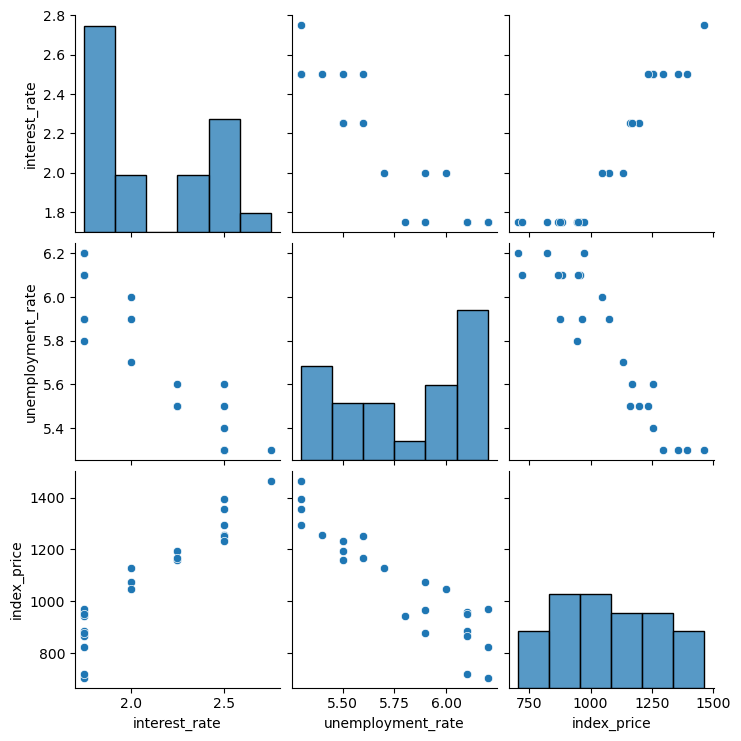

In [417]:
sns.pairplot(df)

In [418]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [419]:
y = df['index_price']
x = df.iloc[:,:-1]

In [420]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

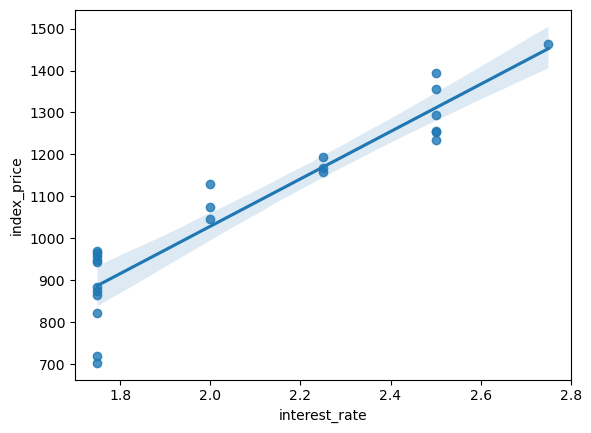

In [421]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

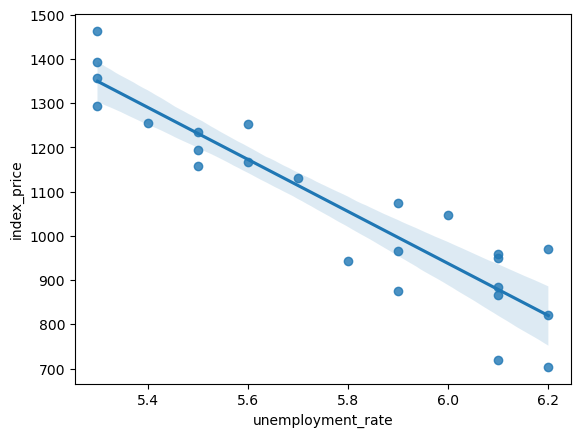

In [422]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price'])

In [423]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [424]:
x_train = scaler.fit_transform(x_train) 

In [425]:
x_test = scaler.transform(x_test) 

In [426]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [427]:
regression = LinearRegression()
regression.fit(x_train,y_train)
print(regression.coef_)
print(regression.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443


In [428]:
y_pred = regression.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
print(mae)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
r2_s = r2_score(y_test,y_pred)
print(r2_s)

59.935781523235526
5793.762887712579
76.11677139574812
0.8278978091457142


Text(0, 0.5, 'y_pred')

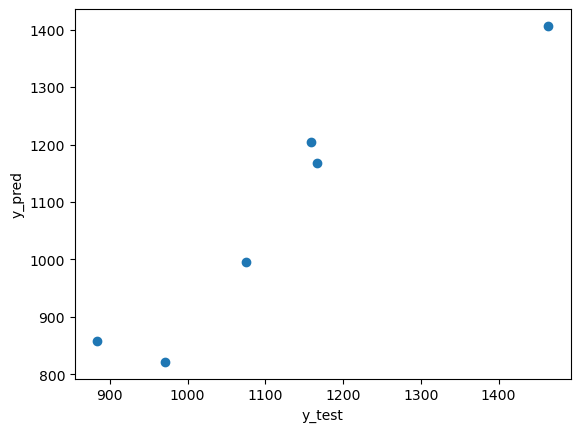

In [429]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [430]:
residual = y_test-y_pred
print(residual)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


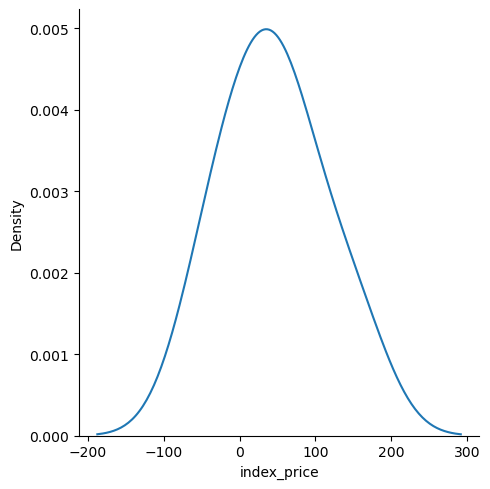

In [431]:
sns.displot(residual,kind='kde')

Text(0, 0.5, 'residual')

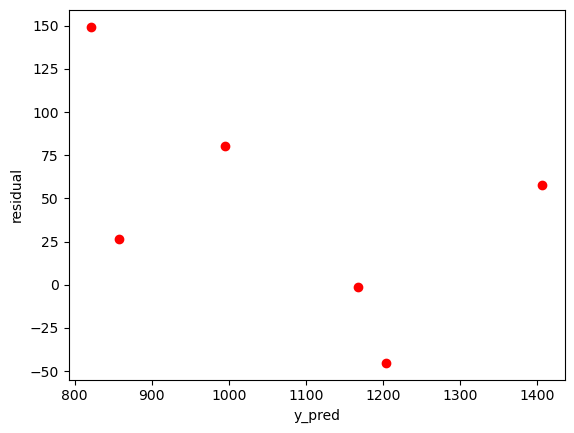

In [432]:
plt.scatter(y_pred,residual,c="red")
plt.xlabel("y_pred")
plt.ylabel("residual")

## Polynomial Linear regression

In [468]:
x = 6*np.random.rand(100,1)-3
y = 0.5*x**2 + 1.5*x + 2 + np.random.randn(100,1)

Text(0, 0.5, 'y dataset')

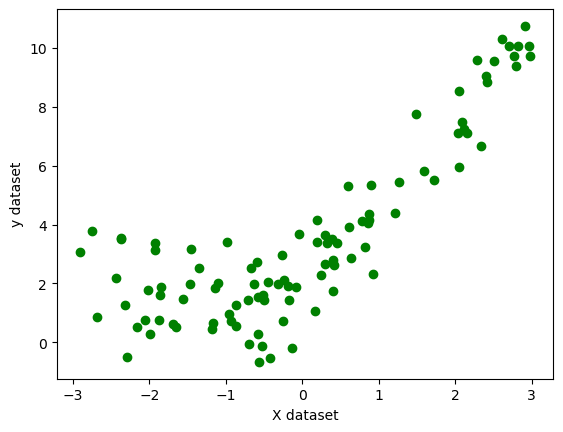

In [469]:
plt.scatter(x,y,color='g')
plt.xlabel("X dataset")
plt.ylabel("y dataset")

In [470]:
x

array([[-0.17629159],
       [-1.84420278],
       [ 2.03853497],
       [ 0.41197799],
       [ 2.78879302],
       [-0.57740822],
       [-1.65622778],
       [-2.68107877],
       [-0.41792179],
       [-0.86340714],
       [-2.43900651],
       [ 1.72386792],
       [ 2.50010305],
       [-1.55493854],
       [ 0.86757425],
       [-0.70312805],
       [-0.52914469],
       [-0.45123818],
       [-0.32429134],
       [ 2.69943045],
       [ 0.1698489 ],
       [-2.06025101],
       [-0.04006821],
       [ 0.89506391],
       [ 1.58736101],
       [ 2.11505676],
       [-1.45854454],
       [ 2.28662504],
       [-0.51952797],
       [ 0.5900137 ],
       [ 0.23684763],
       [-1.87492591],
       [-0.27053773],
       [-0.71136818],
       [ 2.81872193],
       [-0.56473449],
       [-2.37707413],
       [-1.18354183],
       [ 1.48655537],
       [-1.93212785],
       [ 0.61431766],
       [-0.5861596 ],
       [-2.7442856 ],
       [-0.63210048],
       [ 0.63011125],
       [ 2

<Axes: >

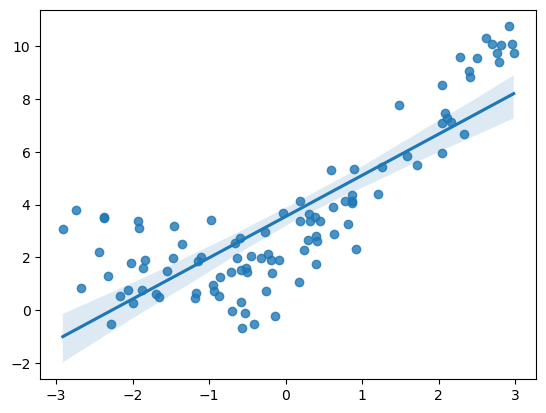

In [471]:
sns.regplot(x=x,y=y)

In [455]:
y

array([[-0.25565114],
       [ 3.8933749 ],
       [ 2.23835274],
       [ 6.50268378],
       [-0.20881979],
       [ 3.55772294],
       [ 2.16379088],
       [ 2.88099741],
       [ 4.33187372],
       [ 2.3646854 ],
       [ 2.47990262],
       [ 4.96186568],
       [ 1.61373624],
       [ 2.48307682],
       [ 0.6464447 ],
       [ 2.00730313],
       [ 7.06996426],
       [-0.44428634],
       [ 2.34457136],
       [ 5.80439026],
       [ 1.10013377],
       [ 2.50547049],
       [ 2.973563  ],
       [10.51949534],
       [ 2.54272506],
       [ 0.79281954],
       [ 1.26641624],
       [ 2.73924812],
       [ 1.24956637],
       [ 2.61309644],
       [ 6.98140286],
       [ 9.48323288],
       [ 1.64620563],
       [ 0.77173404],
       [ 7.2998187 ],
       [ 0.8633721 ],
       [ 1.13792693],
       [ 1.07794345],
       [ 1.71391826],
       [ 3.29401106],
       [ 8.38466262],
       [ 0.99509167],
       [ 8.12352711],
       [ 4.78076734],
       [11.29418367],
       [ 1

In [472]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
regression = LinearRegression()
regression.fit(x_train,y_train)
print(regression.coef_)
print(regression.intercept_)

In [457]:
y_pred = regression.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
print(mae)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
r2_s = r2_score(y_test,y_pred)
print(r2_s)

1.5296852088854336
3.3389747731372346
1.8272861771318785
0.6910772691893041


In [458]:
from sklearn.preprocessing import PolynomialFeatures

In [459]:
poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [460]:
regression = LinearRegression()
regression.fit(x_train_poly,y_train)
print(regression.coef_)
print(regression.intercept_)

[[0.         1.48653344 0.44158808]]
[2.1047154]


In [461]:
plt.scatter(x_train,regression.predict(poly.transform(x_train_poly)))


ValueError: X has 3 features, but PolynomialFeatures is expecting 1 features as input.

In [462]:
plt.scatter(x_train,)

TypeError: scatter() missing 1 required positional argument: 'y'

In [ ]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly,y_train)


In [ ]:
y_pred = regression.predict(x_test_poly)
print(regression.coef_)
print(regression.intercept_)

In [ ]:
score = r2_score(y_test,y_pred)
print(score)

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel('y_pred')

In [ ]:
x = 6*np.random.rand(100,1)-3
y = x**3 + 8*x**2+ 3*x + 2 + np.random.randn(100,1)

In [ ]:
plt.scatter(x,y,color='g')
plt.xlabel("X dataset")
plt.ylabel("y dataset")

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
regression = LinearRegression()
regression.fit(x_train,y_train)
print(regression.coef_)
print(regression.intercept_)

In [ ]:
poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [ ]:
score = r2_score(y_test,y_pred)
print(score)

In [ ]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly,y_train)

In [ ]:
y_pred = regression.predict(x_test_poly)
print(regression.coef_)
print(regression.intercept_)

In [ ]:
score = r2_score(y_test,y_pred)
print(score)

In [463]:
from sklearn.pipeline import Pipeline

In [501]:
def poly_regression(degree):
    x_new = np.linspace(-3,3,200).reshape(200,1)

    poly_features = PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline(
        [
            ("poly_features",poly_features),
            ("lin_reg",lin_reg)
        ]
    )
    poly_regression.fit(x_train,y_train)
    y_pred_new = poly_regression.predict(x_new)
    plt.plot(x_new,y_pred_new,'r',label="Degree"+str(degree),linewidth=2)
    plt.scatter(x_train,y_train,color="blue",linewidth=3)
    plt.scatter(x_test,y_test,color="green",linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis([-4,4,0,10])
    plt.show()
    

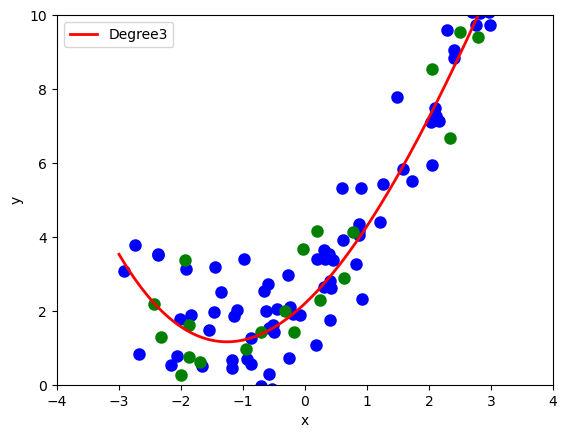

In [502]:
poly_regression(3)

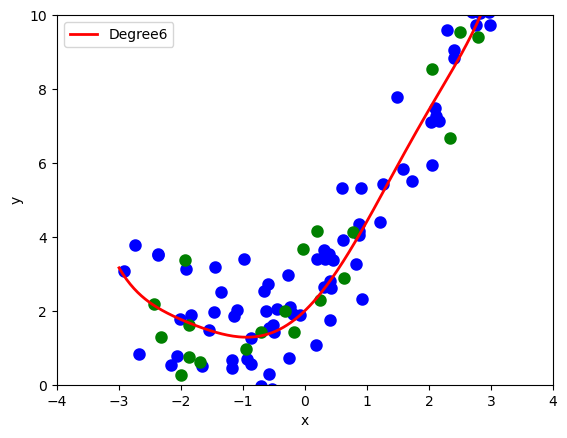

In [503]:
poly_regression(6)